# Exploratory Data Analysis of House Price 
* Kaggle-Competition
    * House Prices: Advanced Regression Techniques
        * <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques'>House Prices: Advanced Regression Techniques</a>
        * <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data'>Data Description</a>

* Reference 
    * https://www.kaggle.com/siddheshpujari/exploratory-data-analysis-of-house-price

## Import Libraries

In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

# Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

# Subplots
from plotly.subplots import make_subplots

# Showing full path of datasets

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('./train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [104]:
# Number of rows and columns

df.shape

(1460, 81)

1460개의 row와 81개의 columns...!<br>
column의 수가 무려...81개다...!

In [105]:
# Columns in our dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
# df.describe().T

In [107]:
# Description of our dataset

df.describe().T

# T refers to transpose that displays the description of our dataset in long format

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [108]:
# Let's look at the skewness of our dataset

df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

*What is skeness?*

* Skewness tells us about the symmetry in a distribution
* If Skewness is equal to zero, It is a symmetrical distribution.
* And If <code>Skewness is less than or more than zero</code> then it is non-symmetrical distribution
* In our above data,
    * 1. LotArea
    * 2. LowQualFinSF
    * 3. 3SsnPorch
    * 4. PoolArea
    * 5. MiscVal
    
* Are highly positively, right skewed.

<code>pandas.DataFrame.info</code><br>
This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [109]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The above information tells us

* Our dadtaset features consists of three datatypes
    * 1. float
    * 2. integer
    * 3. object
    
* Of which total **numerical features** are 38(floats + int64)
* And **categorical features** are 43
* But if we look closely, we see that some of the data types are incorrect.
    * *What?!*
* e.g - <code> MSSubClass</code>, <code>OverallQual</code>, <code>OverallCond</code> should be **object** data types.
* Also we don't have complete data for all of our features

In [110]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* We can see a lot of columns in our dataset.
* We see that some of the features having int data type consists of discrete values.
* If the features have discrete values, it's better to change them into categorical variables that will help us in better anlysis.

✅ If the features have discrete values, it's better to change them into categorical variables that will help us in better analysis!

* **Note**
    * <code>df[column_name].astype()<code>

In [111]:
features_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 
                     'MoSold', 'YrSold', 'GarageCars']  # ???
int_to_object = ['MSSubClass', 'OverallQual', 'OverallCond', 'GarageCars']
'''
for feature in int_to_object:
    df[feature] = df[feature].astype(object)  # convert int feature to obj feature
'''

for feature in int_to_object:
    df[feature] = df[feature].astype(object)  # convert int feature to obj feature!

int_to_datetime = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

# We also have some datetime features, that we will deal later 
# For now keep them as int datatype


In [112]:
df.OverallCond.describe()

count     1460
unique       9
top          5
freq       821
Name: OverallCond, dtype: int64

It shows that 'OverallCond' feature changed to object datatype!

In [113]:
# Drop Id column as it is not required
# 필요없는 Id column은 drop시켜!

# df.drop(columns=['Id'], axis=1, inplace=True)  # axis=1:        column에서 drop
                                               # inplace=True:  실제 DataFrame 변경
df.head()
# df.drop(columns=['Id'], axis=1, inplace=True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


🚦Do it!<br>
Drop Id feature from DataFrame

In [98]:
df.drop(labels='Id', axis=1).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [114]:
df.drop(labels='Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Null Values

<code>df.isna()</code><br>
Detect missing values

In [115]:
# let's see if our dataset contains missing values

df.isna().sum().sum()

6965

6965 is a big number that tells us there are a lot of missing values.

In [116]:
type(df.isna().sum())

pandas.core.series.Series

In [117]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

<code>df.isna().sum()</code> <- this doesn't help us much, let's try to visualize the number of missing values in each feature.

In [118]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [119]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values')
fig.update_traces(textposition='outside')
fig.show()

In [120]:
temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


*Q. 좀 더 쉽게 <code>pandas.Series</code>을 <code>DataFrame</code>로 바꿀 수는 없을까?*

* <code>pandas.Series.to_frame</code>
    * <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html'>pandas.Series.to_frame</a>
    * convert Series to DataFrame

In [122]:
df_isna = df.isna().sum().to_frame()
df_isna = df_isna.reset_index()

In [123]:
df_isna.columns

Index(['index', 0], dtype='object')

In [125]:
df_isna.rename(columns={"feature":"feature", 0: "null_num"}, inplace=True)
# df_isna

In [129]:
df_isna[df_isna.null_num>0].sort_values(by='null_num', ascending=False).style.background_gradient(cmap='Reds')

,index,null_num
71,PoolQC,1453
73,MiscFeature,1406
5,Alley,1369
72,Fence,1179
56,FireplaceQu,690
2,LotFrontage,259
57,GarageType,81
58,GarageYrBlt,81
59,GarageFinish,81
62,GarageQual,81


In [135]:
df_isna = df.isna().sum().to_frame().reset_index().rename(columns={'index':'class', 0:"num"})
df_isna

,class,num
0,MSSubClass,0
1,MSZoning,0
2,LotFrontage,259
3,LotArea,0
4,Street,0
5,Alley,1369
6,LotShape,0
7,LandContour,0
8,Utilities,0
9,LotConfig,0


In [143]:
df_isna[df_isna.num > 0].sort_values(by='num', ascending=False).reset_index().drop(labels='index', axis=1)

,class,num
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


In [144]:
df_isna = df_isna[df_isna.num > 0].sort_values(by='num', ascending=False).reset_index().drop(labels='index', axis=1)
df_isna

,class,num
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


In [146]:
df_isna.style.background_gradient(cmap='Reds')

,class,num
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageType,81
7,GarageYrBlt,81
8,GarageFinish,81
9,GarageQual,81


In [157]:
df_class = df_isna['class'].tolist()
print(type(df_class))
print(df_class)

<class 'list'>
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical']


In [167]:
# df.info()
non_obj = []

for feature in df_class:
#     print(feature, ":", df[feature].dtype)
    if df[feature].dtype != object:
        print(feature, ":", df[feature].dtype)
        non_obj.append(feature)

LotFrontage : float64
GarageYrBlt : float64
MasVnrArea : float64


In [169]:
print(non_obj)
print('len_non_obj:', len(non_obj))

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
len_non_obj: 3


* Out of the 18 columns with missing values
* There are numerical features <code>LostFrontage, MassVnrArea, GarageYrBlt</code>
* And the rest are categorical features

## Firstly, we'll deal with the numerical features. 

🏷 Numll Valeus -> deal with the numerical feature

In [179]:
df_isna[(df_isna['class']=='LotFrontage') | (df_isna['class']=='MasVnrArea') | (df_isna['class']=='GarageYrBlt')]

,class,num
5,LotFrontage,259
7,GarageYrBlt,81
16,MasVnrArea,8


Let's start filling these null values

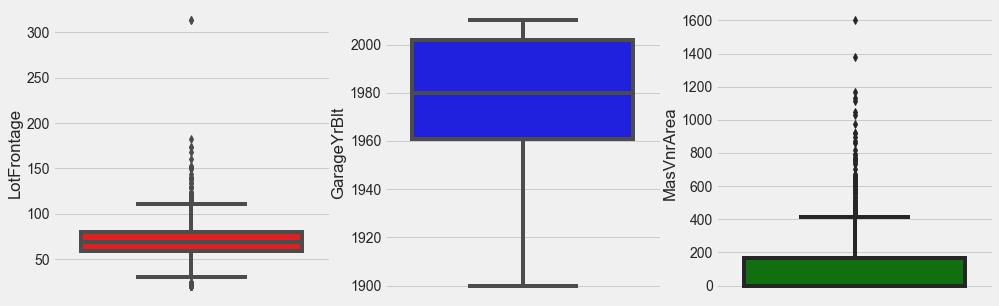

In [180]:
# There's no need of dropping the na valaues as we have less missing values. 
# If there are outliers in these three columns, we can fill them with their median values
# If not then mean is fine!

plt.figure(figsize=(15, 5))

# features_to_examine = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
features_to_examine = non_obj
temp = df[features_to_examine]
colors = ['', 'red', 'blue', 'green']

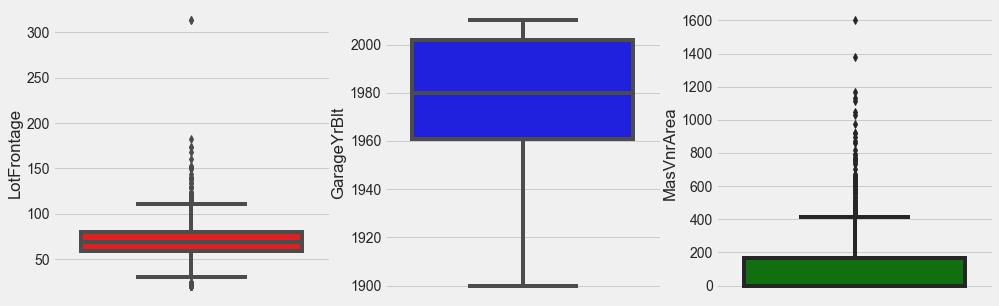

In [183]:
featuers_to_examine = non_obj
temp = df[features_to_examine]
colors = ['', 'red', 'blue', 'green']

plt.figure(figsize=(15, 5))

i=1
for col in temp.columns:
    plt.subplot(1, 3, i)
    a1 = sns.boxplot(data=temp, y=col, color=colors[i])
    i+=1

<code>plt.subplots</code>를 사용해보자!

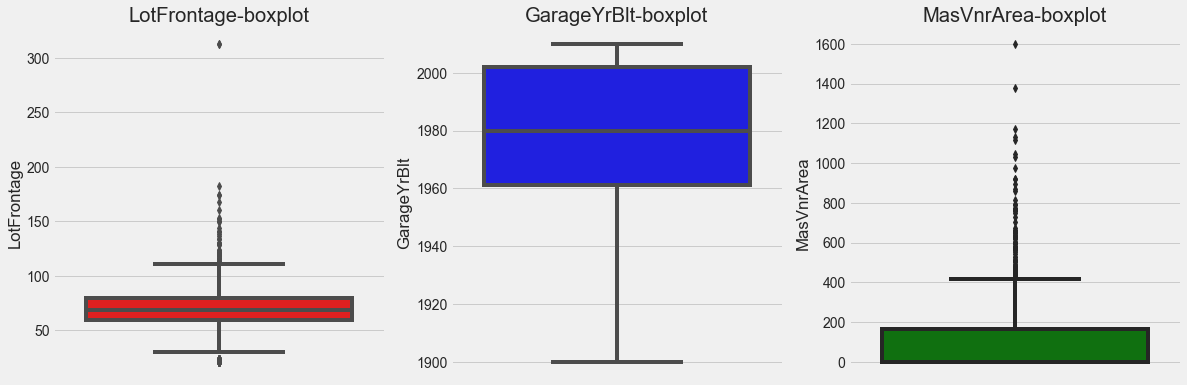

In [186]:
f, ax = plt.subplots(1, 3, figsize=(18, 6))

colors = ['red', 'blue', 'green']
i = 0
for feature in non_obj:
    sns.boxplot(data=temp, y=feature, color=colors[i], ax=ax[i])
    ax[i].set_title(str(feature) + "-boxplot")
    i+=1

plt.show()

* Reference
    * https://github.com/Steve-YJ/Explore-Kaggle/blob/master/01.%20Titanic/01.%20Kaggle-Titanic.ipynb

In [188]:
non_obj

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [187]:
# There are outliers in Lotfrontage and MasVnrArea
# Let's look at the mean and median values of all three columns

df['LotFrontage'].mean(), df['LotFrontage'].median()

(70.04995836802665, 69.0)

In [189]:
df['MasVnrArea'].mean(), df['MasVnrArea'].median()

(103.68526170798899, 0.0)

In [190]:
df['GarageYrBlt'].mean(), df['GarageYrBlt'].median()

(1978.5061638868744, 1980.0)

* The mean and median values of MasVnArea are significantly differenct
* If there are outliers present, we'll go with median values

In [192]:
# filling the missing values with median

'''
for col in features_to_examine:
    df[col].fillna(df[col].median(), inplace=True)  # fillna(df.column_name.median(), inplace=True)
'''
features_to_examine

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [193]:
for col in features_to_examine:
    df[col].fillna(df[col].median(), inplace=True)

In [198]:
df.isna().sum()[df.isna().sum()>0].to_frame().reset_index()

,index,0
0,Alley,1369
1,MasVnrType,8
2,BsmtQual,37
3,BsmtCond,37
4,BsmtExposure,38
5,BsmtFinType1,37
6,BsmtFinType2,38
7,Electrical,1
8,FireplaceQu,690
9,GarageType,81


In [ ]:
# we can see 